In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

First I perform some Exploratory Data Analysis (EDA) to get a general idea of the kinds of numbers in the dataset. This dataset contains data from 3337 providers in all 50 states. Each provider has a Provider ID number, provider name, address and hospital referral region. Each provider has reported billed cost and payment data for a number of procedure categories, i.e. DRG definitions. There are 100 different DRG definitions in this dataset across all providers.

For a given DRG definition, each provider reported:
* The average covered charges billed to Medicare by the provider
* The total payments made to the provider (including payments from Medicare and the co-payments and deductibles paid by the beneficiary)
* The average payment just from Medicare.

These averages are over the total discharges that fell under that DRG definition.

* Imports the cleaned data set.

In [3]:
df=pd.read_csv('data/IPPS_Data_Clean.csv',dtype={'provider_id':str,'provider_zip_code':str, 'drg_id':str})
df.head(3)

,drg_id,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79


* Imports the GPS locations of every unique provider

In [4]:
dfprovgeo=pd.read_csv('data/Providers_Geocode.csv',dtype={'provider_id':str})
dfprovgeo.head(3)

,provider_id,lat,lng
0,10001,31.216725,-85.363068
1,10005,34.221556,-86.159441
2,10006,34.793845,-87.683155


* Some preliminary numbers:

In [5]:
print('                                             Total number of rows:', len(df))
print('                                       Number of unique providers:', df.provider_id.nunique())
print('                Number of unique procedure types (drg_definition):', df.drg_id.nunique())
print('Total number of discharges over all providers and procedure types:', df.total_discharges.sum())

                                             Total number of rows: 163065
                                       Number of unique providers: 3337
                Number of unique procedure types (drg_definition): 100
Total number of discharges over all providers and procedure types: 6975318


* The following plot shows the of number providers that reported a given number of DRG definitions. For example, 95 providers only reported data for a single DRG definition, and 48 providers reported data for all 100 DRGs.

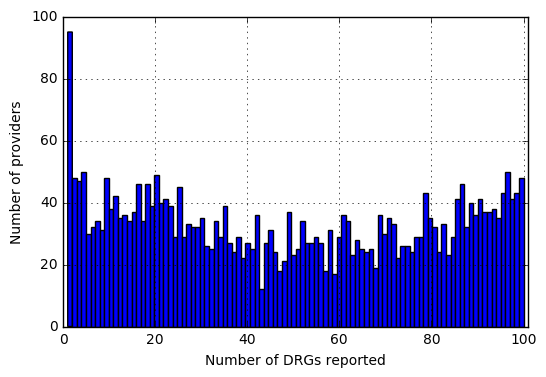

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel('Number of DRGs reported')
ax.set_ylabel('Number of providers')
ax.set_xlim([0,101])
df.groupby('provider_id').size().hist(bins=100,ax=ax);

* The following code creates a dataframe that gives the number of each DRG definition by state, which is essentially the number of providers in that state that reported data for that DRG.

In [7]:
dfg = df.groupby(['drg_id','provider_state']).size()
dfg = dfg.unstack('provider_state').fillna(0)
dfg.head()

provider_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
drg_id,,,,,,,,,,,,,,,,,,,,,
039,1.0,23.0,16.0,24.0,67.0,10.0,15.0,3.0,3.0,81.0,...,4.0,32.0,78.0,6.0,28.0,1.0,21.0,25.0,8.0,2.0
057,1.0,25.0,11.0,18.0,78.0,14.0,16.0,4.0,2.0,102.0,...,3.0,20.0,70.0,2.0,33.0,1.0,10.0,20.0,9.0,1.0
064,2.0,35.0,18.0,26.0,165.0,18.0,22.0,5.0,4.0,113.0,...,5.0,33.0,111.0,7.0,49.0,3.0,35.0,27.0,13.0,1.0
065,6.0,55.0,32.0,38.0,204.0,27.0,26.0,7.0,5.0,138.0,...,7.0,48.0,161.0,8.0,62.0,5.0,39.0,50.0,22.0,4.0
066,4.0,40.0,28.0,30.0,145.0,18.0,25.0,6.0,5.0,121.0,...,6.0,39.0,127.0,8.0,51.0,4.0,38.0,33.0,14.0,2.0


* This is the total number of providers nationwide that reported data for each DRG definition. The blue dashed line is the total number of unique providers in the data set (3337).

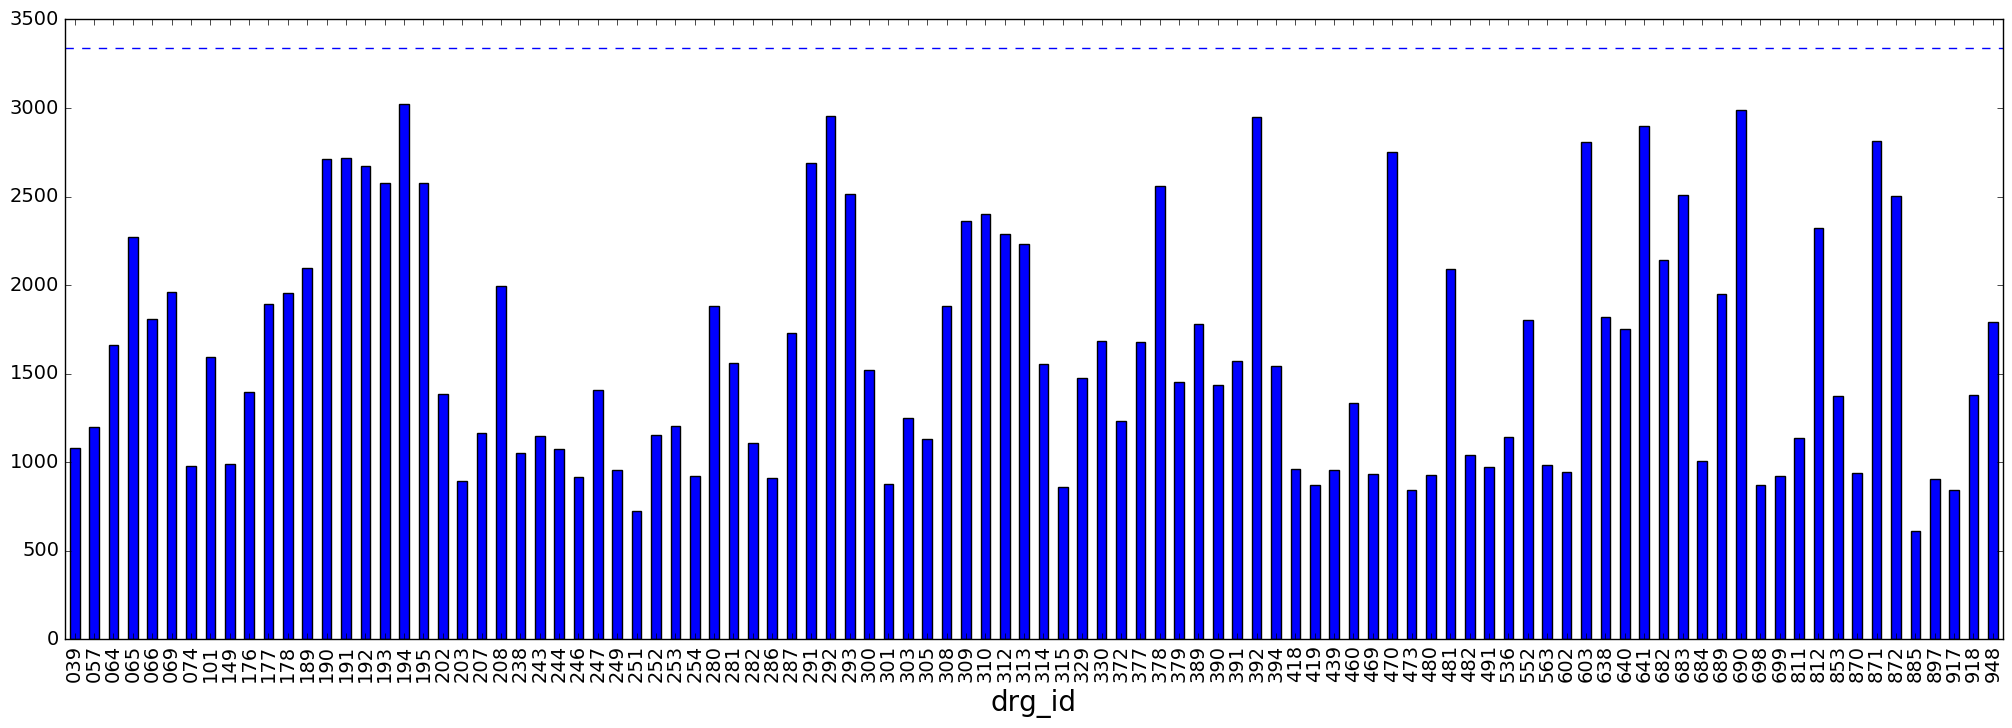

In [8]:
fig, ax = plt.subplots()
dfg.sum(1).plot(kind='bar',figsize=(25,8),fontsize=14,ax=ax)

ax.axhline(y=3337,linestyle='--')
ax.set_xlabel('drg_id',fontsize=20);

* Next I look at a plot of the average covered charges and the average total payments for different procedures and how these two values compare.

* Below is a scatter plot showing these values for DRG definition 039 for all providers with data. We can see a large amount of scatter in the average covered charges across providers compared to the average total payments by Medicare.
    * Note: The discrete nature of the plot in the x-direction (provider_id) comes from how the providers are numbered by state. Essentially each of those stripes in the y-direction represent a different state.

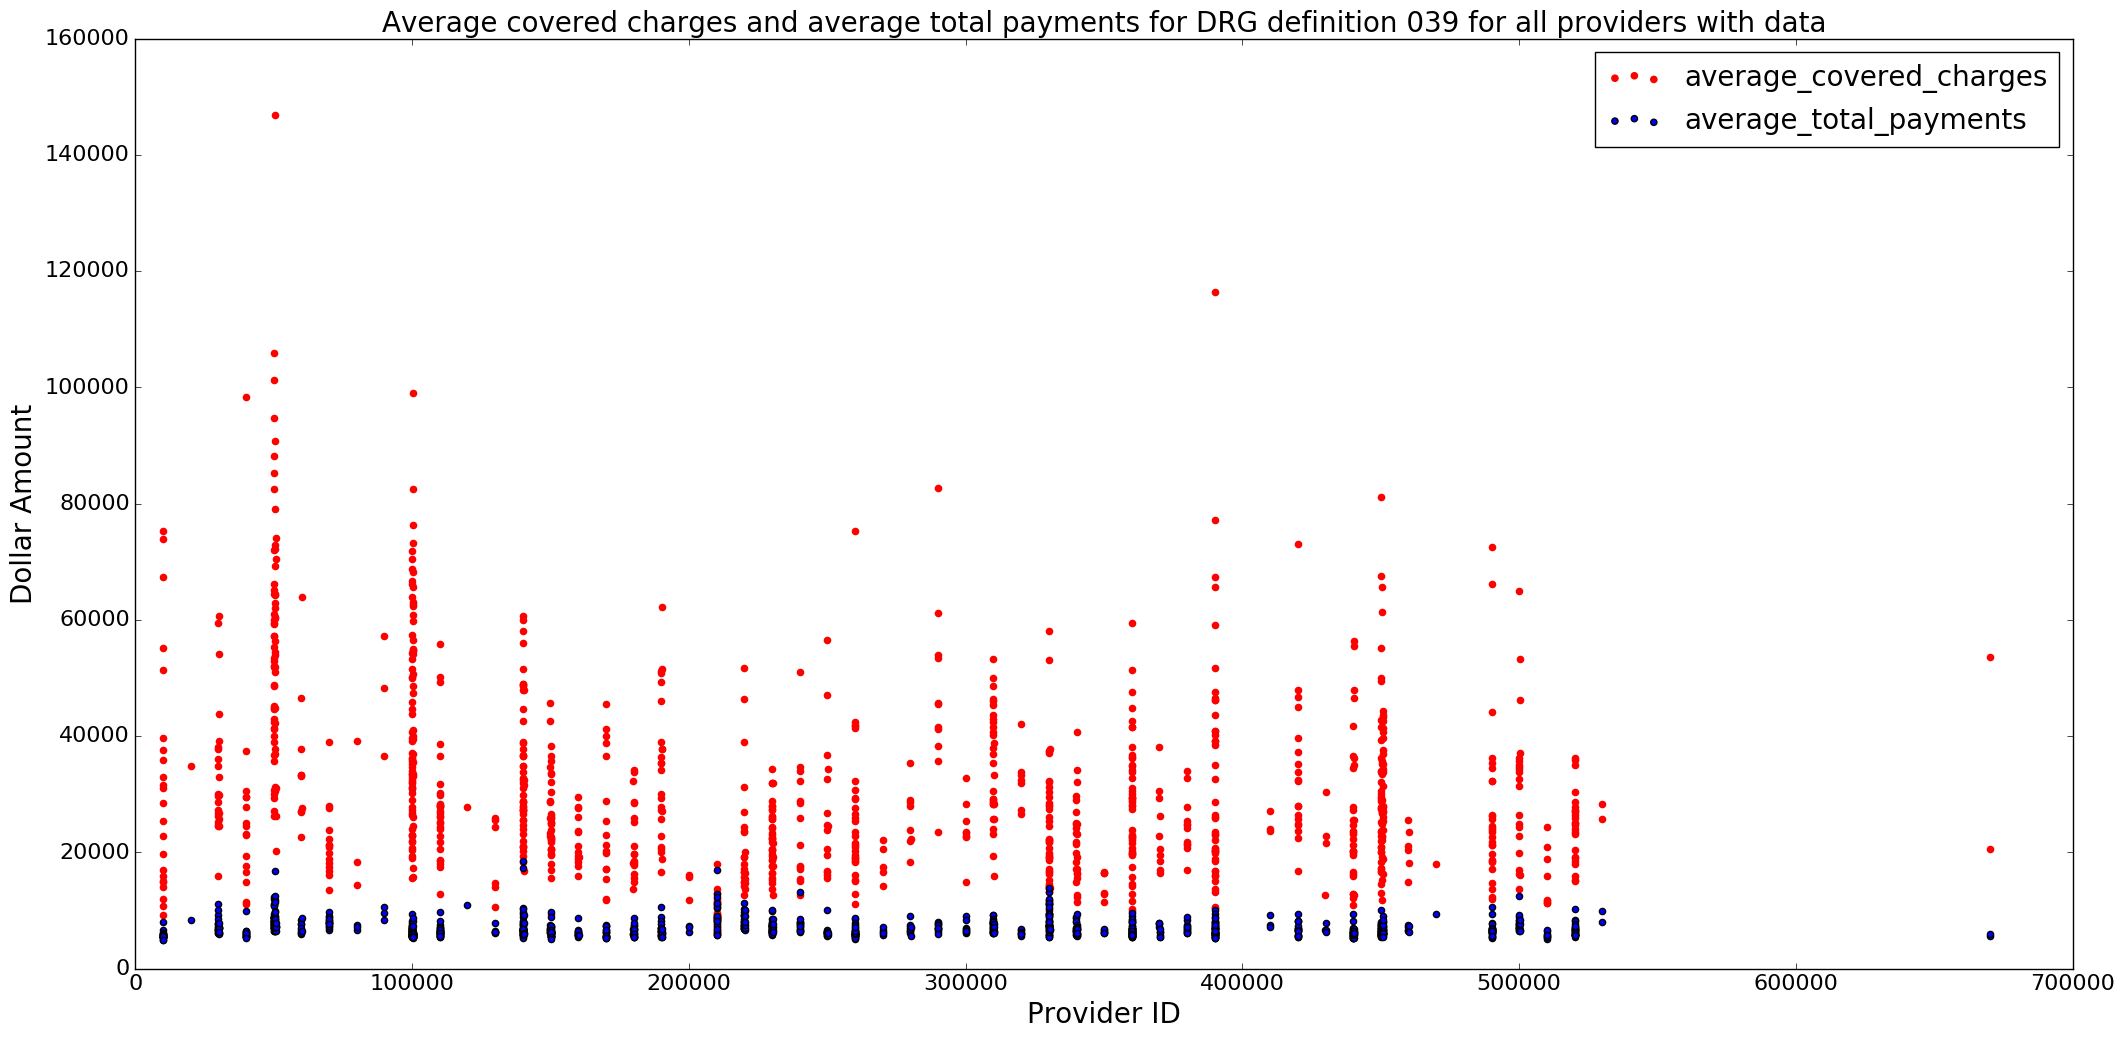

In [9]:
fig, ax = plt.subplots(figsize=(25,12))

dfp=df[df.drg_id == '039']
pid=np.array(dfp.provider_id.astype(int))

ax.set_title('Average covered charges and average total payments for DRG definition '+ \
             '039 for all providers with data', fontsize=20)
ax.set_xlabel('Provider ID',fontsize=20)
ax.set_ylabel('Dollar Amount',fontsize=20)
ax.set_xlim([0,700000])
ax.set_ylim([0,160000])
ax.tick_params(labelsize=16)

ax.scatter(pid, dfp.average_covered_charges,color='r')
ax.scatter(pid, dfp.average_total_payments)
ax.legend(fontsize=20);

* For each DRG definition the providers reported the average total charges, average total payments and the average medicare payments over the total number of discharges. One way to characterize these numbers is to look at their median values over all providers nationwide. The following code calculates the national median cost, median payments and median medicare payments for each DRG definition.

In [10]:
natmed = pd.DataFrame(df.groupby('drg_id',sort=False)['average_covered_charges','average_total_payments', \
                                                       'average_medicare_payments'].median()).reset_index()
natmed = natmed.rename(columns={'average_covered_charges':'median_covered_charges', \
                                 'average_total_payments':'median_total_payments', \
                              'average_medicare_payments':'median_medicare_payments' })
natmed.head(3)

,drg_id,median_covered_charges,median_total_payments,median_medicare_payments
0,039,26651.000,6582.890,5269.280
1,057,20453.050,6093.750,5104.780
2,069,18342.265,4740.235,3627.465


* A bar plot that shows the national medians for each value described above. We can see that the median payments and medicare payments are consistenly a fraction of the covered charges as was shown in the previous plot.

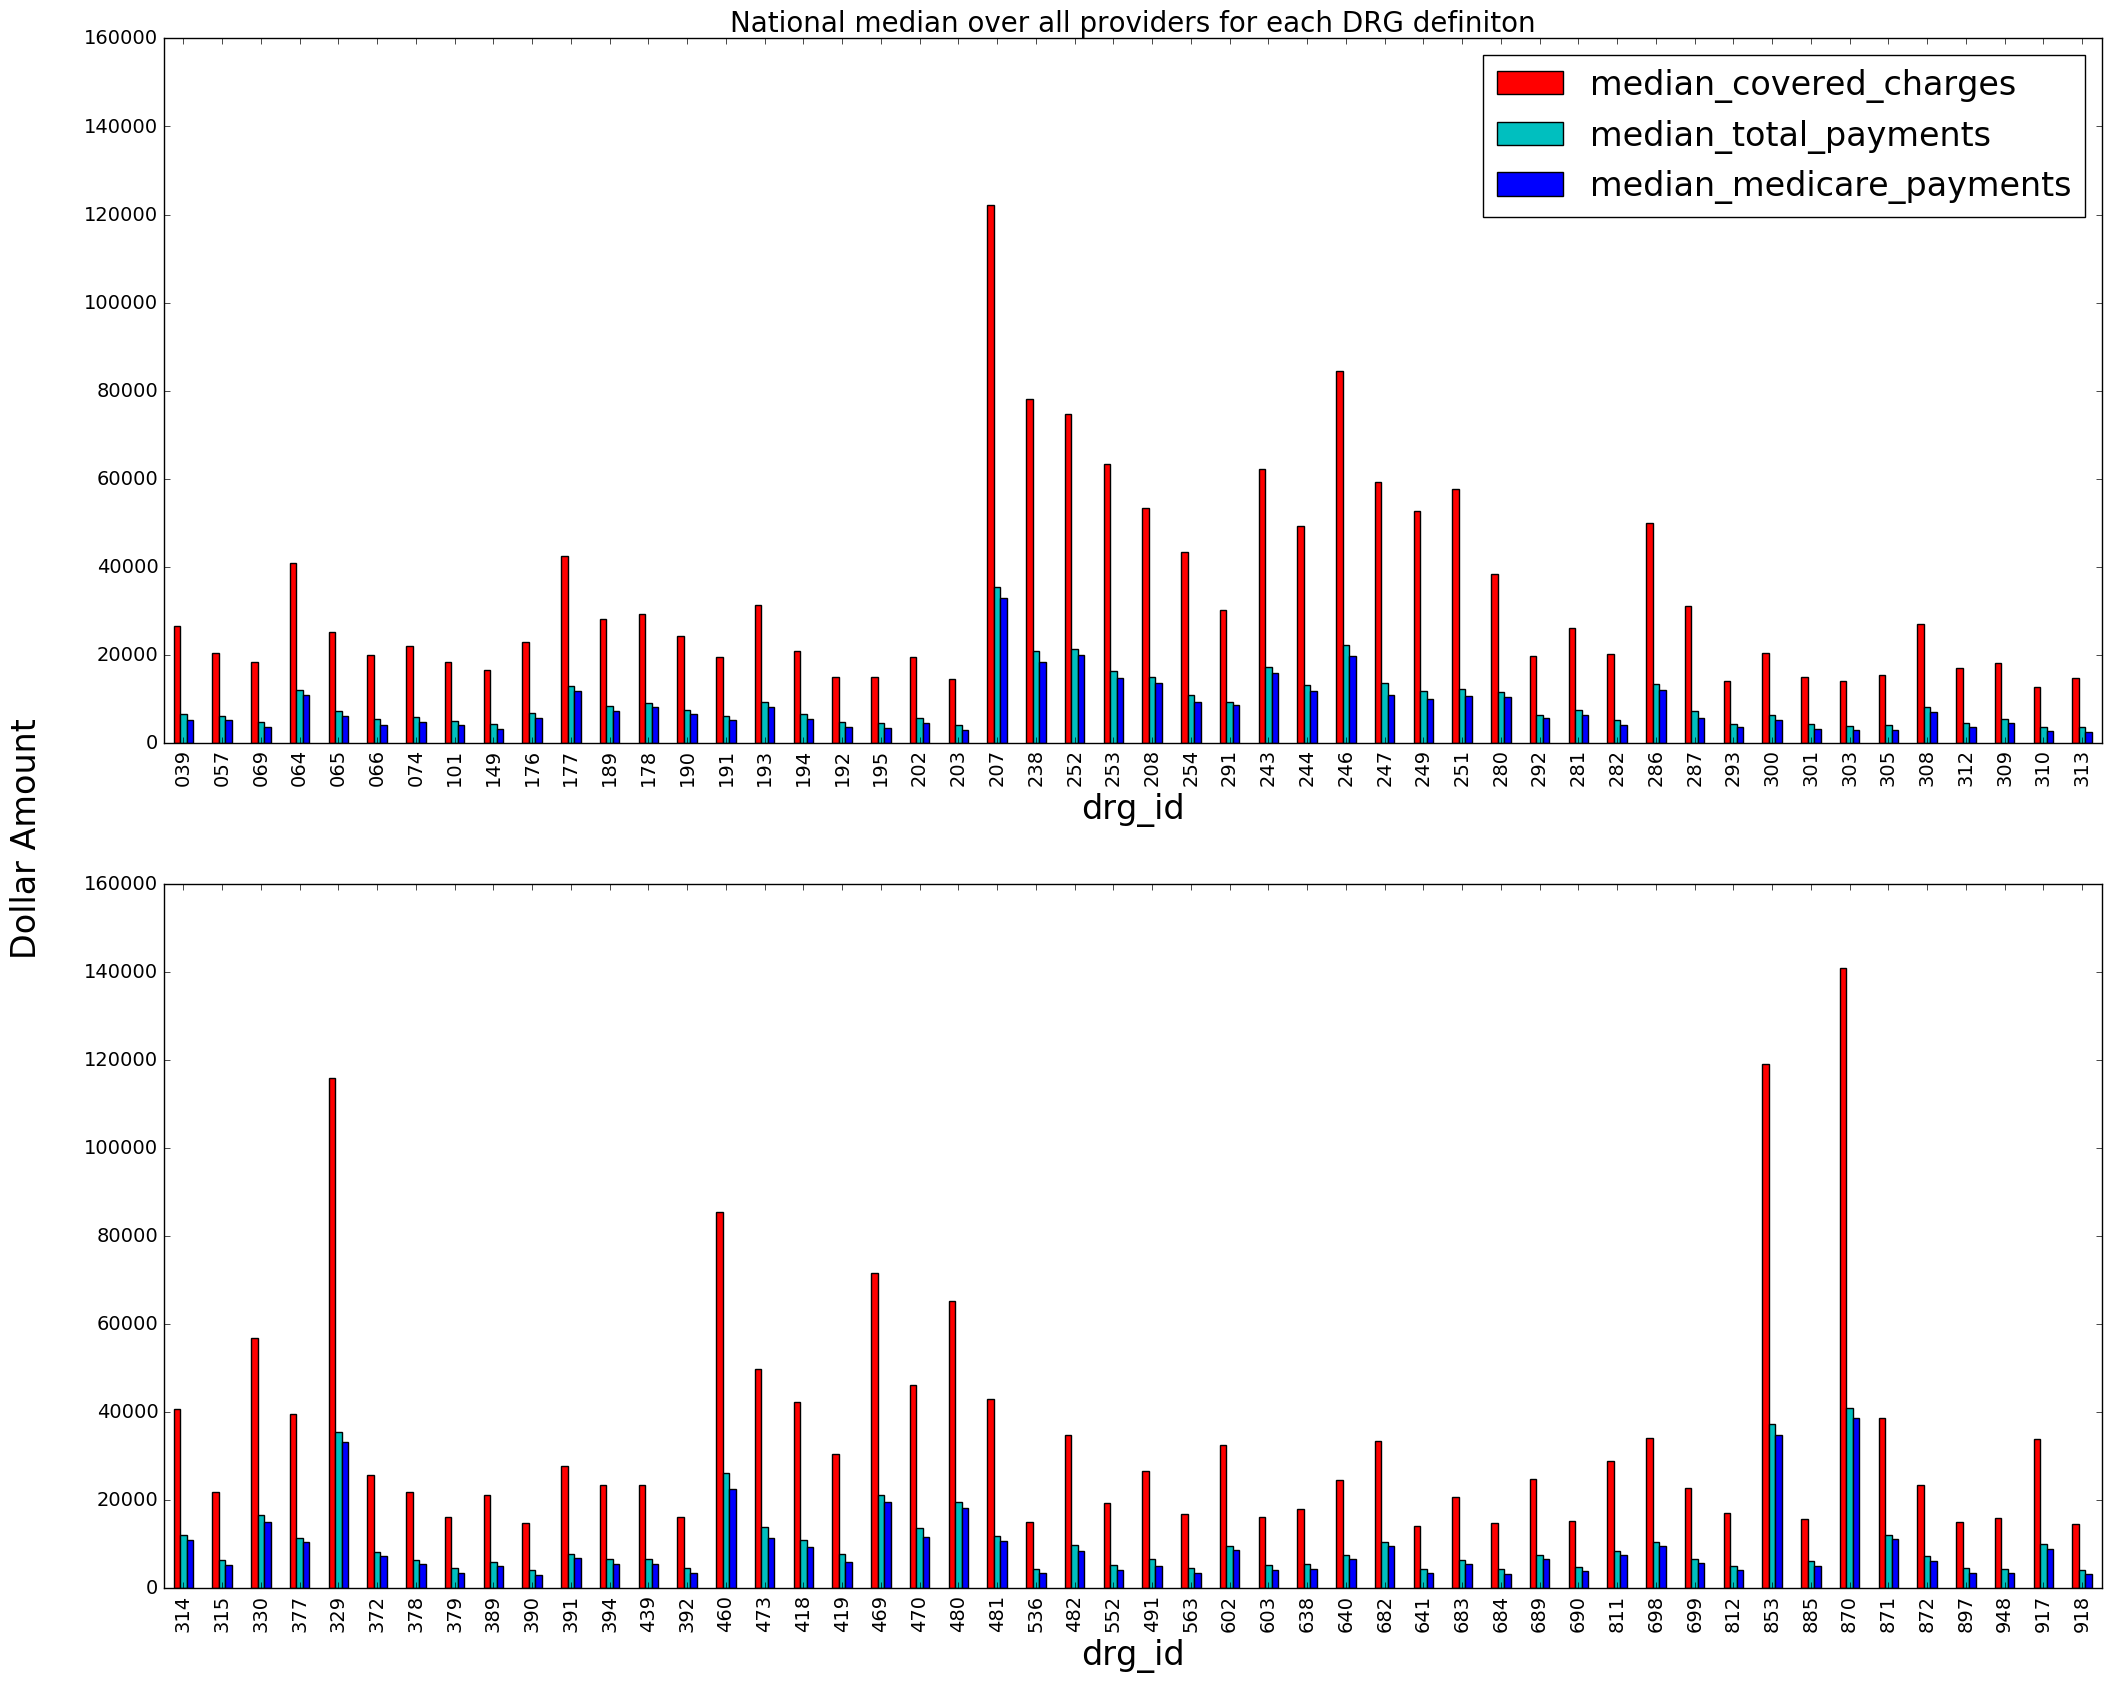

In [11]:
fig, ax = plt.subplots(2,sharey=True,figsize=(25,20))
natmed[0:50].set_index('drg_id').plot(kind='bar',color=('r','c','b'),fontsize=14,ax=ax[0])
natmed[50:].set_index('drg_id').plot(kind='bar',color=('r','c','b'),fontsize=14,ax=ax[1],legend=False)

ax[0].legend(fontsize=24)
ax[0].set_title('National median over all providers for each DRG definiton',fontsize=20)
ax[0].set_xlabel('drg_id',fontsize=24)
ax[1].set_xlabel('drg_id',fontsize=24)
fig.text(0.07, 0.5, 'Dollar Amount',ha='center',va='center',rotation='vertical',fontsize=24);

* Next I look at the fractional difference in total charges, payments and medicare payments from the national median (for that particular DRG definition).
* The following code creates new columns that give these fractional differences for each row in the dataset.

In [12]:
procedures=df.drg_id.unique()

for i in procedures:    
    sel = df.drg_id == i
    med = natmed.loc[natmed.drg_id == i,natmed.columns[1:]].values[0].tolist()
    
    df.loc[sel,'charge_frac_diff'] = df.loc[sel,'average_covered_charges']/med[0] - 1.0
    df.loc[sel,'payment_frac_diff'] = df.loc[sel,'average_total_payments']/med[1] - 1.0
    df.loc[sel,'medicare_frac_diff'] = df.loc[sel,'average_medicare_payments']/med[2] - 1.0
    
df.head(3)

,drg_id,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,charge_frac_diff,payment_frac_diff,medicare_frac_diff
0,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,0.236842,-0.122385,-0.095943
1,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,-0.432222,-0.120816,-0.055524
2,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,0.409342,-0.174382,-0.154763


* Normalized histograms of the fractional differences from the national median for all providers. Again, for the average covered charges there is a larger spread that for the other two values.

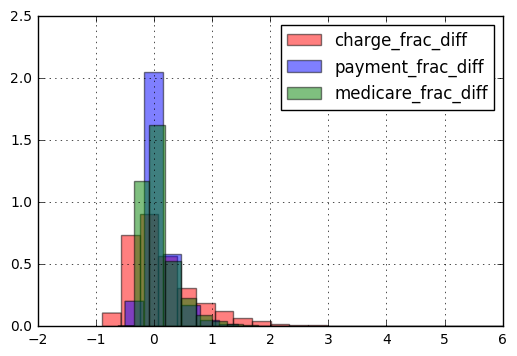

In [13]:
fig, ax = plt.subplots()
plt.xlim([-2,6])

df.hist(['charge_frac_diff'],bins=30, ax=ax, color='r',alpha=.5,normed=True)
df.hist(['payment_frac_diff'],bins=30, ax=ax,color='b',alpha=.5,normed=True)
df.hist(['medicare_frac_diff'],bins=30, ax=ax,color='g',alpha=.5,normed=True)

ax.set_title('')
ax.legend(['charge_frac_diff','payment_frac_diff','medicare_frac_diff']);

* Next I look at the fractional difference of covered charges compared to the national median for two providers by procedure. For the first provider we see that for some DRG definitions the covered charges are above the national median and some are below, but for the second plot we see that for every DRG definition the covered charges are below.

Number of procedures:  92
Number of procedures:  49


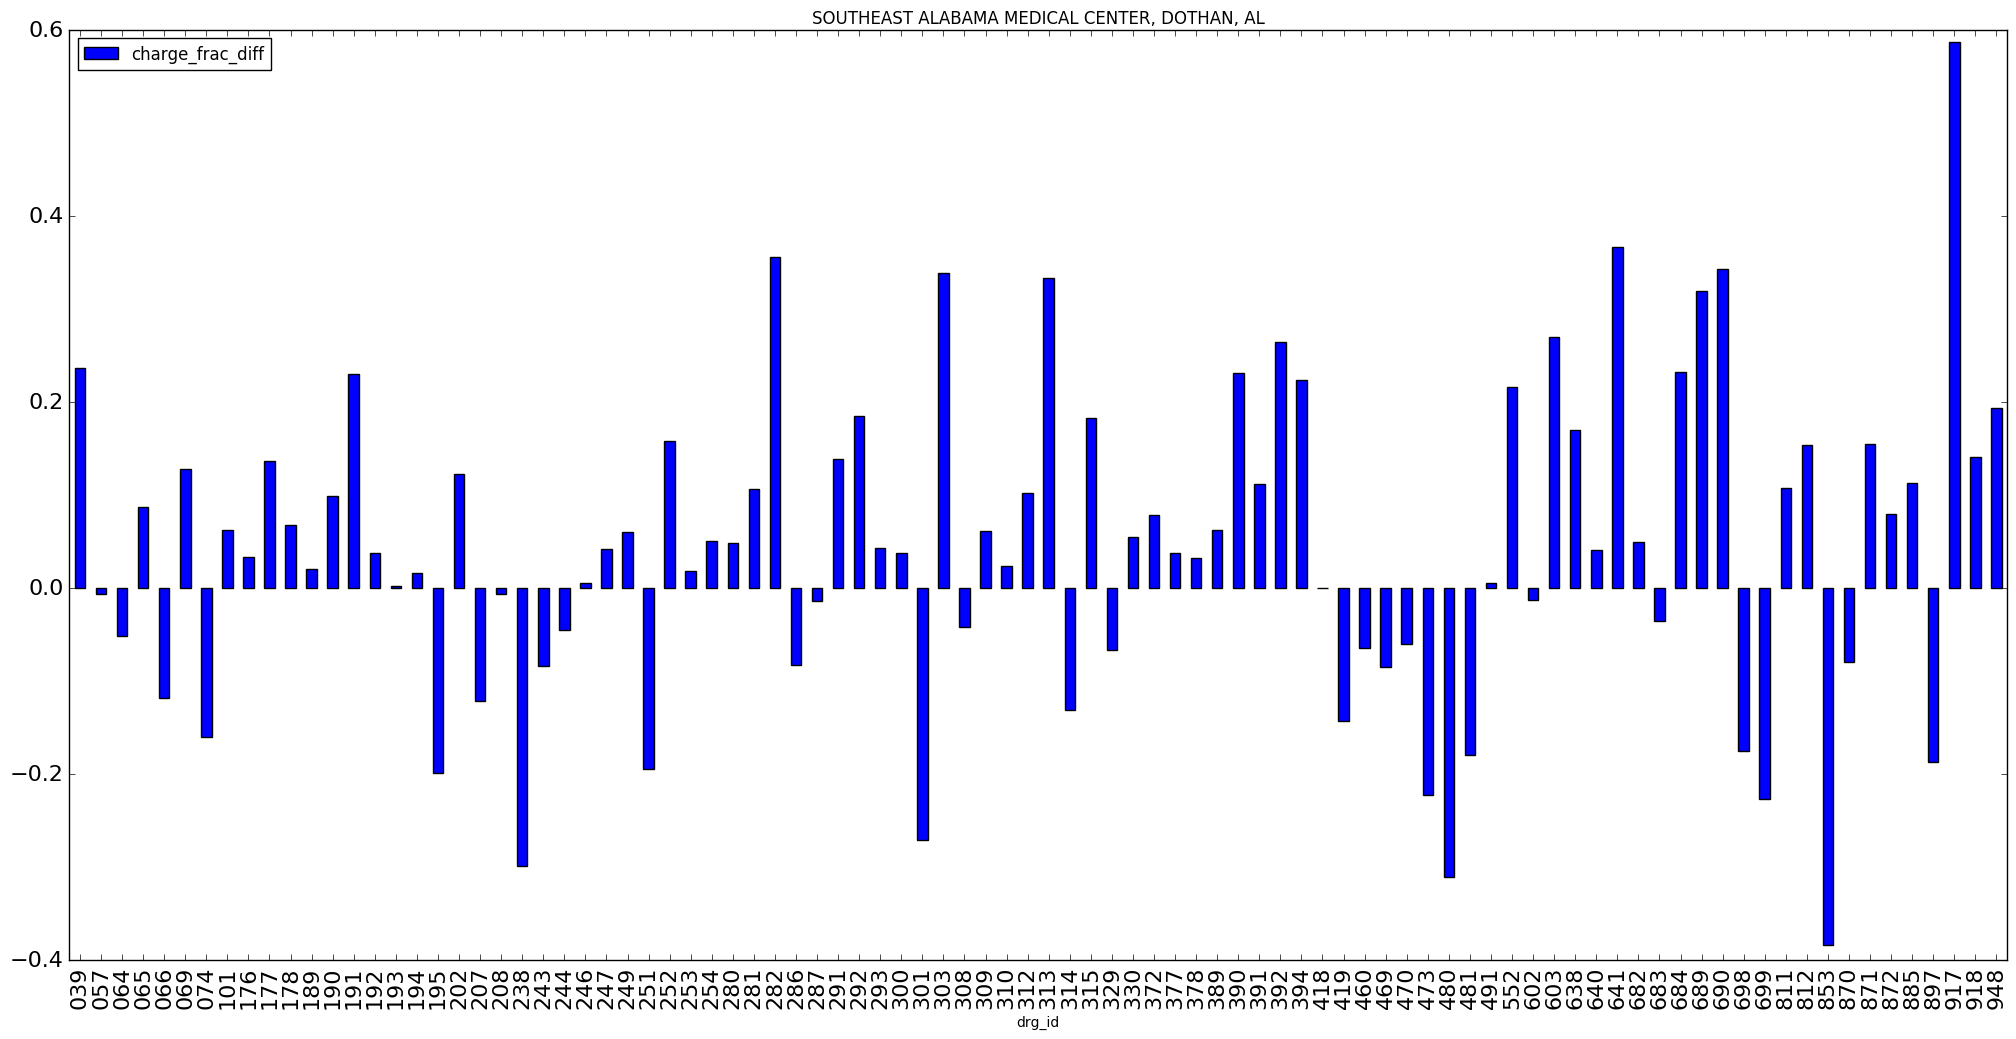

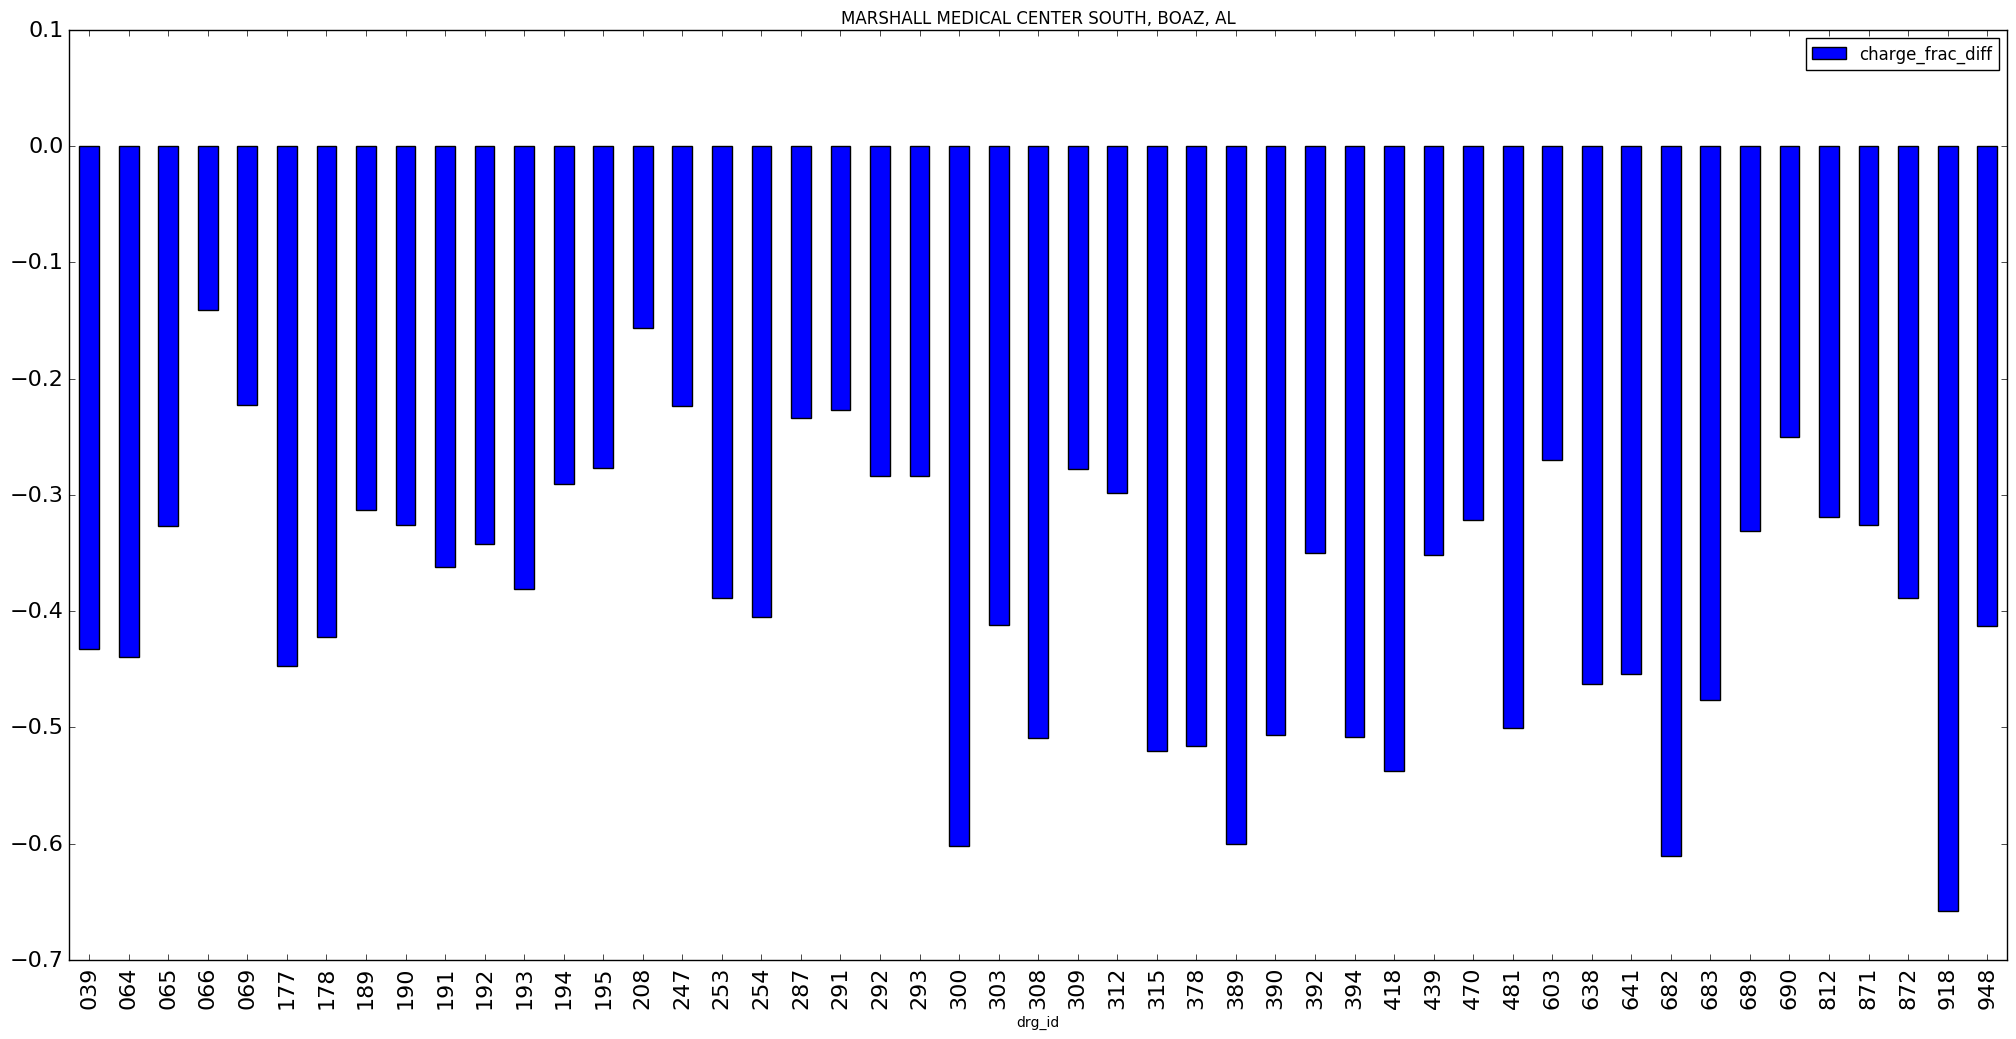

In [14]:
prov = df.provider_id.unique()

for i in [0,1]:

    dfprov = df[df.provider_id == prov[i]]
    provider=dfprov.provider_name.iloc[0]+', '+dfprov.provider_city.iloc[0]+', '+dfprov.provider_state.iloc[0]
    print('Number of procedures: ',len(dfprov))
    dfprov[['drg_id','charge_frac_diff']].set_index('drg_id').plot(kind='bar',figsize=(25,12),title=provider,fontsize=16)

* Next I add classification columns that show whether the each quantity is above or below the national median (i.e. True if it is greater than or equal to the median, False if it is below).

In [15]:
df['charge_frac_diff_class'] = df.charge_frac_diff >= 0.0
df['payment_frac_diff_class'] = df.payment_frac_diff >= 0.0
df['medicare_frac_diff_class'] = df.medicare_frac_diff >= 0.0

* Next I look specifically at the average total charges classification for each provider. I total up the number of procedures above or below the national median for each provider, and add a classification column showing whether there are more procedures above or below.

In [16]:
inclass = 'charge_frac_diff_class'
df_frac = df[['provider_id',inclass]].groupby(['provider_id',inclass]).size()

df_frac = df_frac.unstack(inclass).fillna(0.0)
df_frac['frac_class'] = df_frac[df_frac.columns[1]] > df_frac[df_frac.columns[0]]
df_frac.head()

charge_frac_diff_class,False,True,frac_class
provider_id,,,
100001,3.0,81.0,True
100002,3.0,89.0,True
100006,0.0,100.0,True
100007,1.0,99.0,True
100008,0.0,92.0,True


* The following code merges the previous dataframe with the providers geocode dataframe in order to plot the locations of which providers have more procedures above or below the national median. This also adds a column that is the alpha value used when plotting.

In [17]:
df_frac = df_frac.merge(dfprovgeo.set_index('provider_id'),left_index=True,right_index=True)

df_frac.loc[df_frac.frac_class == True,'alpha'] = df_frac[df_frac.columns[1]]/np.sum(df_frac[df_frac.columns[0:2]],axis=1)
df_frac.loc[df_frac.frac_class == False,'alpha'] = df_frac[df_frac.columns[0]]/np.sum(df_frac[df_frac.columns[0:2]],axis=1)
df_frac.alpha = 2*(df_frac.alpha - 0.5)
df_frac.loc[df_frac.alpha == 0.0,'alpha'] = 0.01

df_frac.head()

charge_frac_diff_class,False,True,frac_class,lat,lng,alpha
provider_id,,,,,,
10001,31.0,61.0,True,31.216725,-85.363068,0.326087
10005,49.0,0.0,False,34.221556,-86.159441,1.000000
10006,31.0,55.0,True,34.793845,-87.683155,0.279070
10011,65.0,22.0,False,33.596457,-86.667650,0.494253
10016,7.0,73.0,True,33.252444,-86.813555,0.825000


* Plots of the provider locations where the blue points are providers that have more procedures below the national median and red points are the providers with more procedures above. The darker the point on the plot, the larger the percentage of procedures are above (or below) the national median.

Number of providers with more procedures below: 1926
Number of providers with more procedures above: 1411


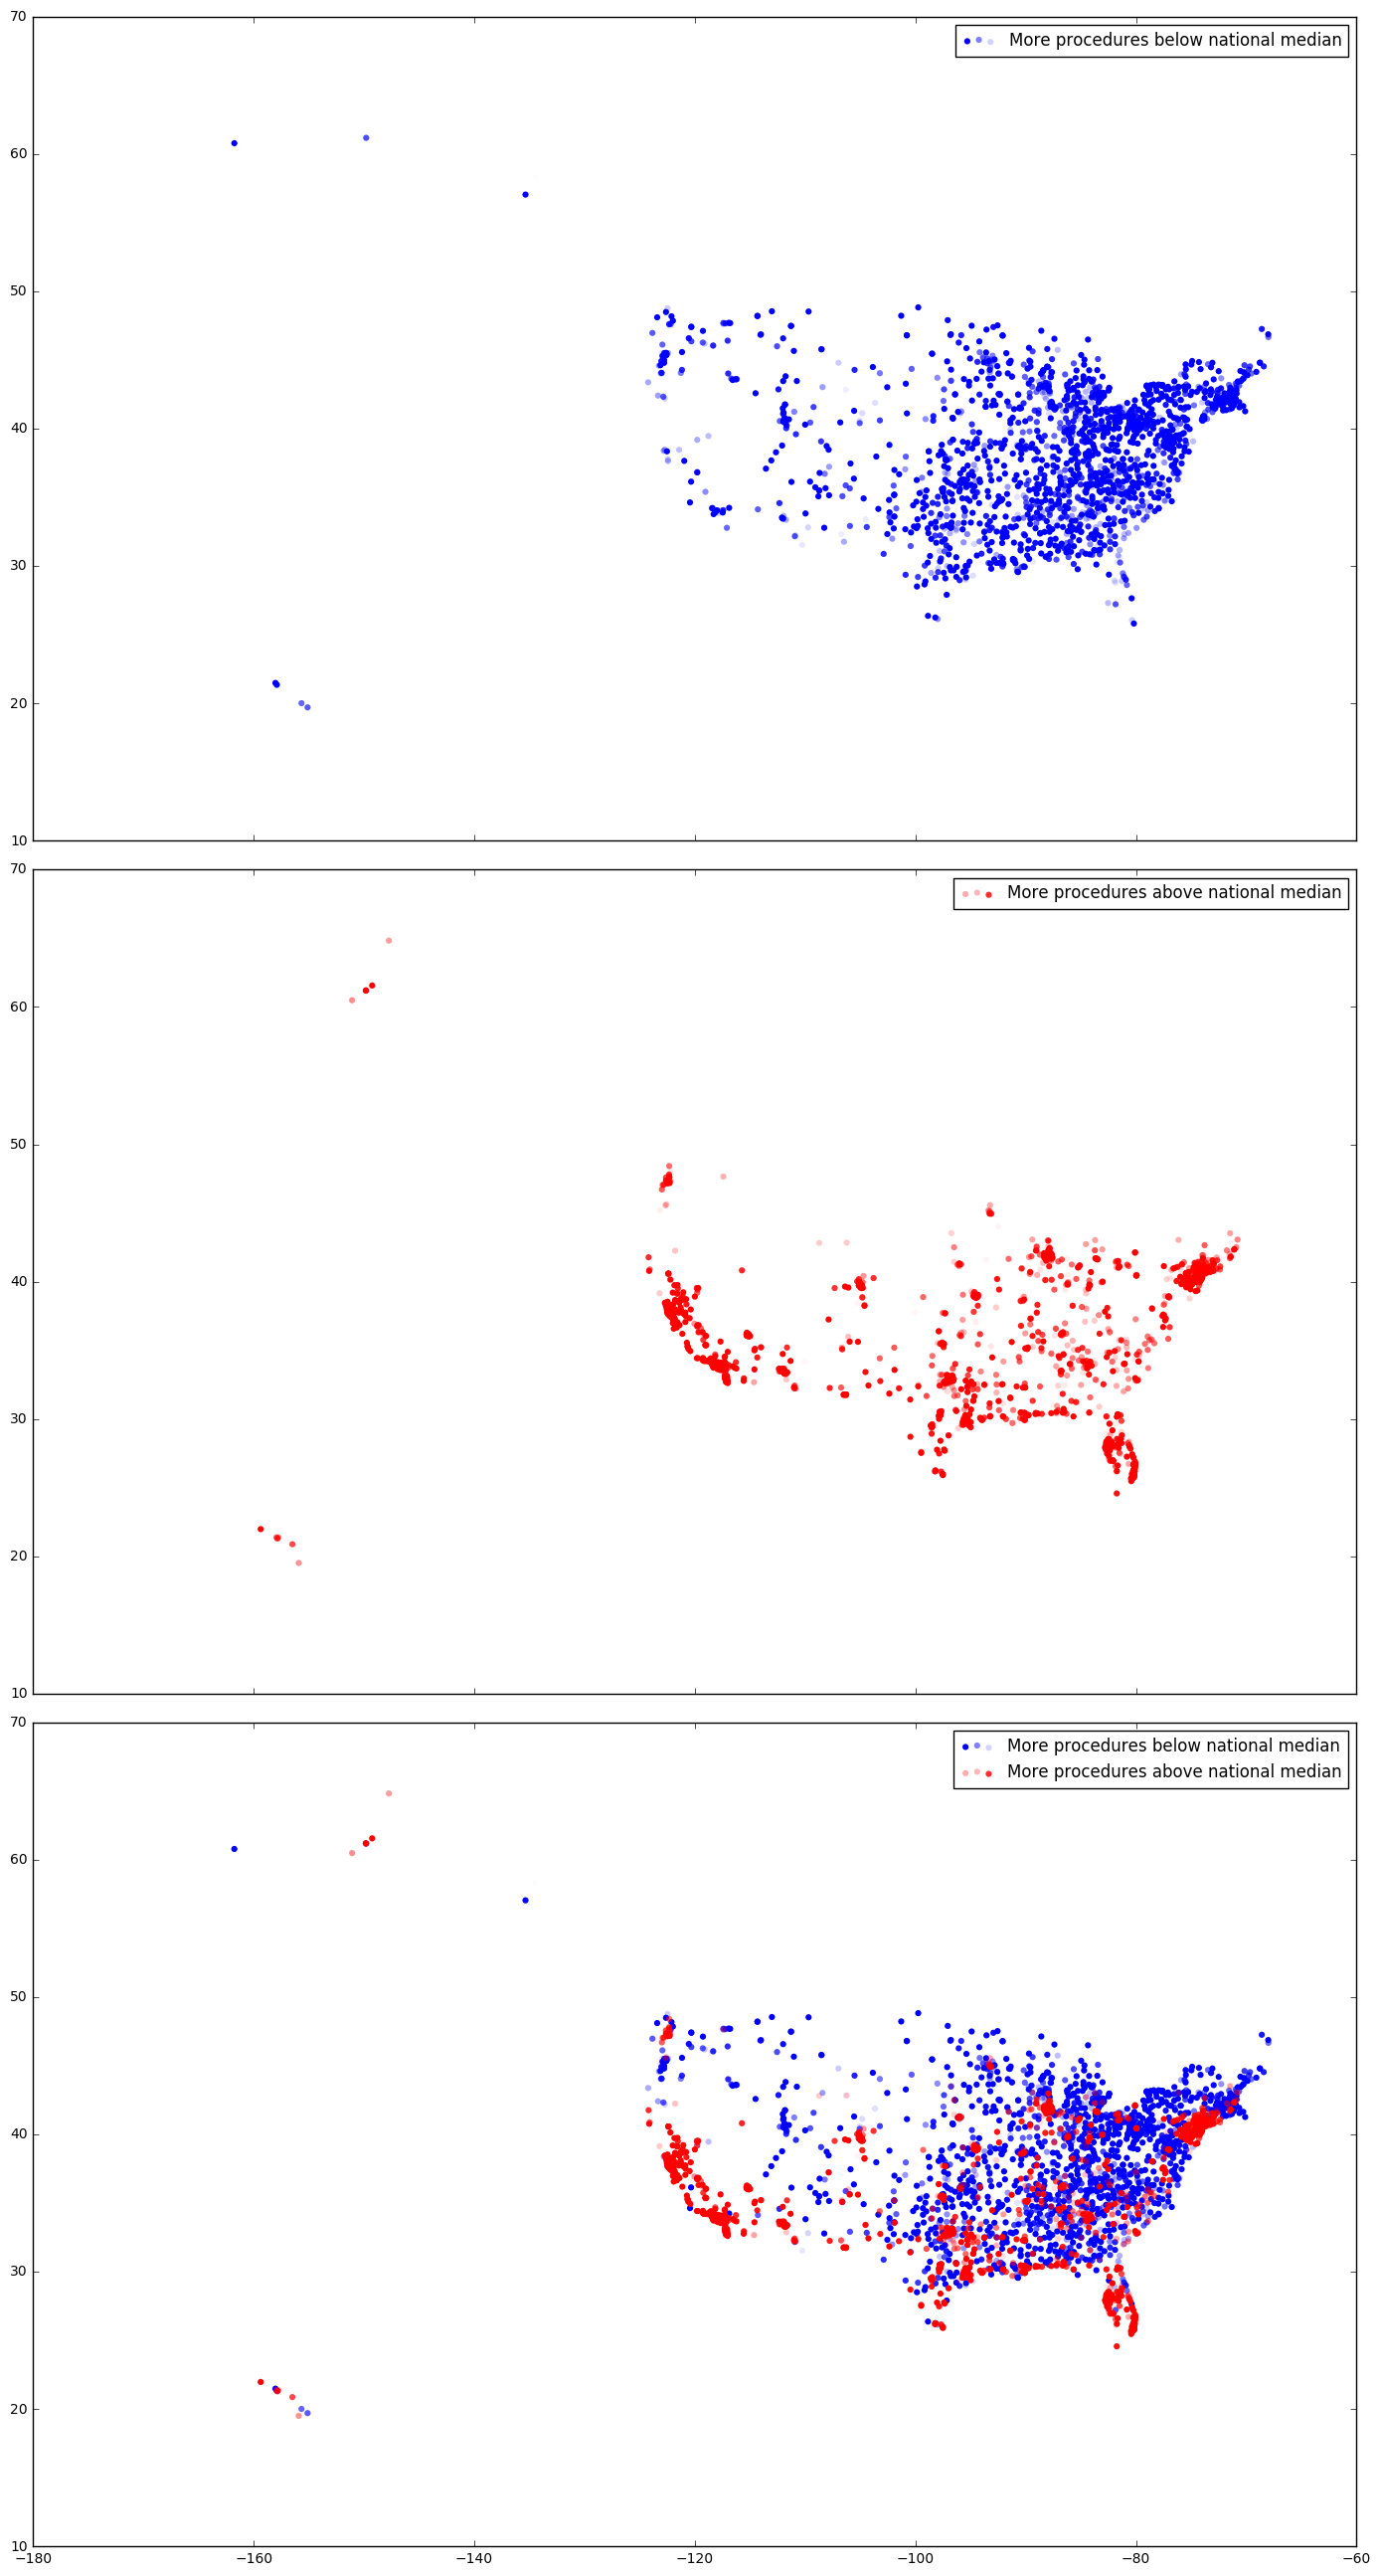

In [18]:
label = ['More procedures below national median','More procedures above national median']

sel1 = (df_frac.frac_class == False)
b_colors = np.zeros((len(df_frac[sel1]),4))
b_colors[:,2] = 1.0
b_colors[:,3] = df_frac[sel1].alpha
                    
sel2 = (df_frac.frac_class == True)
r_colors = np.zeros((len(df_frac[sel2]),4))
r_colors[:,0] = 1.0
r_colors[:,3] = df_frac[sel2].alpha

fig , ax = plt.subplots(nrows=3,ncols=1,figsize=(14,26),sharey=True,sharex=True)
plt.tight_layout()

x1 = df_frac[sel1].lng
y1 = df_frac[sel1].lat

x2 = df_frac[sel2].lng
y2 = df_frac[sel2].lat

ax[0].scatter(x1, y1, color=b_colors,edgecolors='none')
ax[0].legend([label[0]])

ax[1].scatter(x2, y2, color=r_colors,edgecolors='none')
ax[1].legend([label[1]])

ax[2].scatter(x1, y1, color=b_colors,edgecolors='none')
ax[2].scatter(x2, y2, color=r_colors,edgecolors='none')
ax[2].legend(label)

print('Number of providers with more procedures below:',len(df_frac[sel1]))
print('Number of providers with more procedures above:',len(df_frac[sel2]))

* Next I determine the fractional difference in covered cost from the national median for each provider averaged over all procedures. This essentially gives a single number for each provider that characterizes whether their billed cost and payments received tend to be above or below the national median.

In [19]:
fracmn = pd.DataFrame(df.groupby('provider_id',sort=False)['charge_frac_diff','payment_frac_diff', \
                                                          'medicare_frac_diff'].mean()).reset_index()
fracmn = fracmn.rename(columns={'charge_frac_diff':'charge_frac_diff_mean', \
                                'payment_frac_diff':'payment_frac_diff_mean', \
                                'medicare_frac_diff':'medicare_frac_diff_mean'})
fracmn.head()

,provider_id,charge_frac_diff_mean,payment_frac_diff_mean,medicare_frac_diff_mean
0,10001,0.045061,-0.124586,-0.135714
1,10005,-0.381475,-0.093539,-0.107064
2,10006,0.063646,-0.165382,-0.186938
3,10011,-0.136274,-0.126344,-0.171758
4,10016,0.305562,-0.119381,-0.151544


* This is a scatter plot of the average fractional difference in total charges and total payments for each provider. Since each cluster of points is a different state, I provide a second plot that labels each cluster by the state. Again the spread in median values is larger for a given state compared to the total payments made.

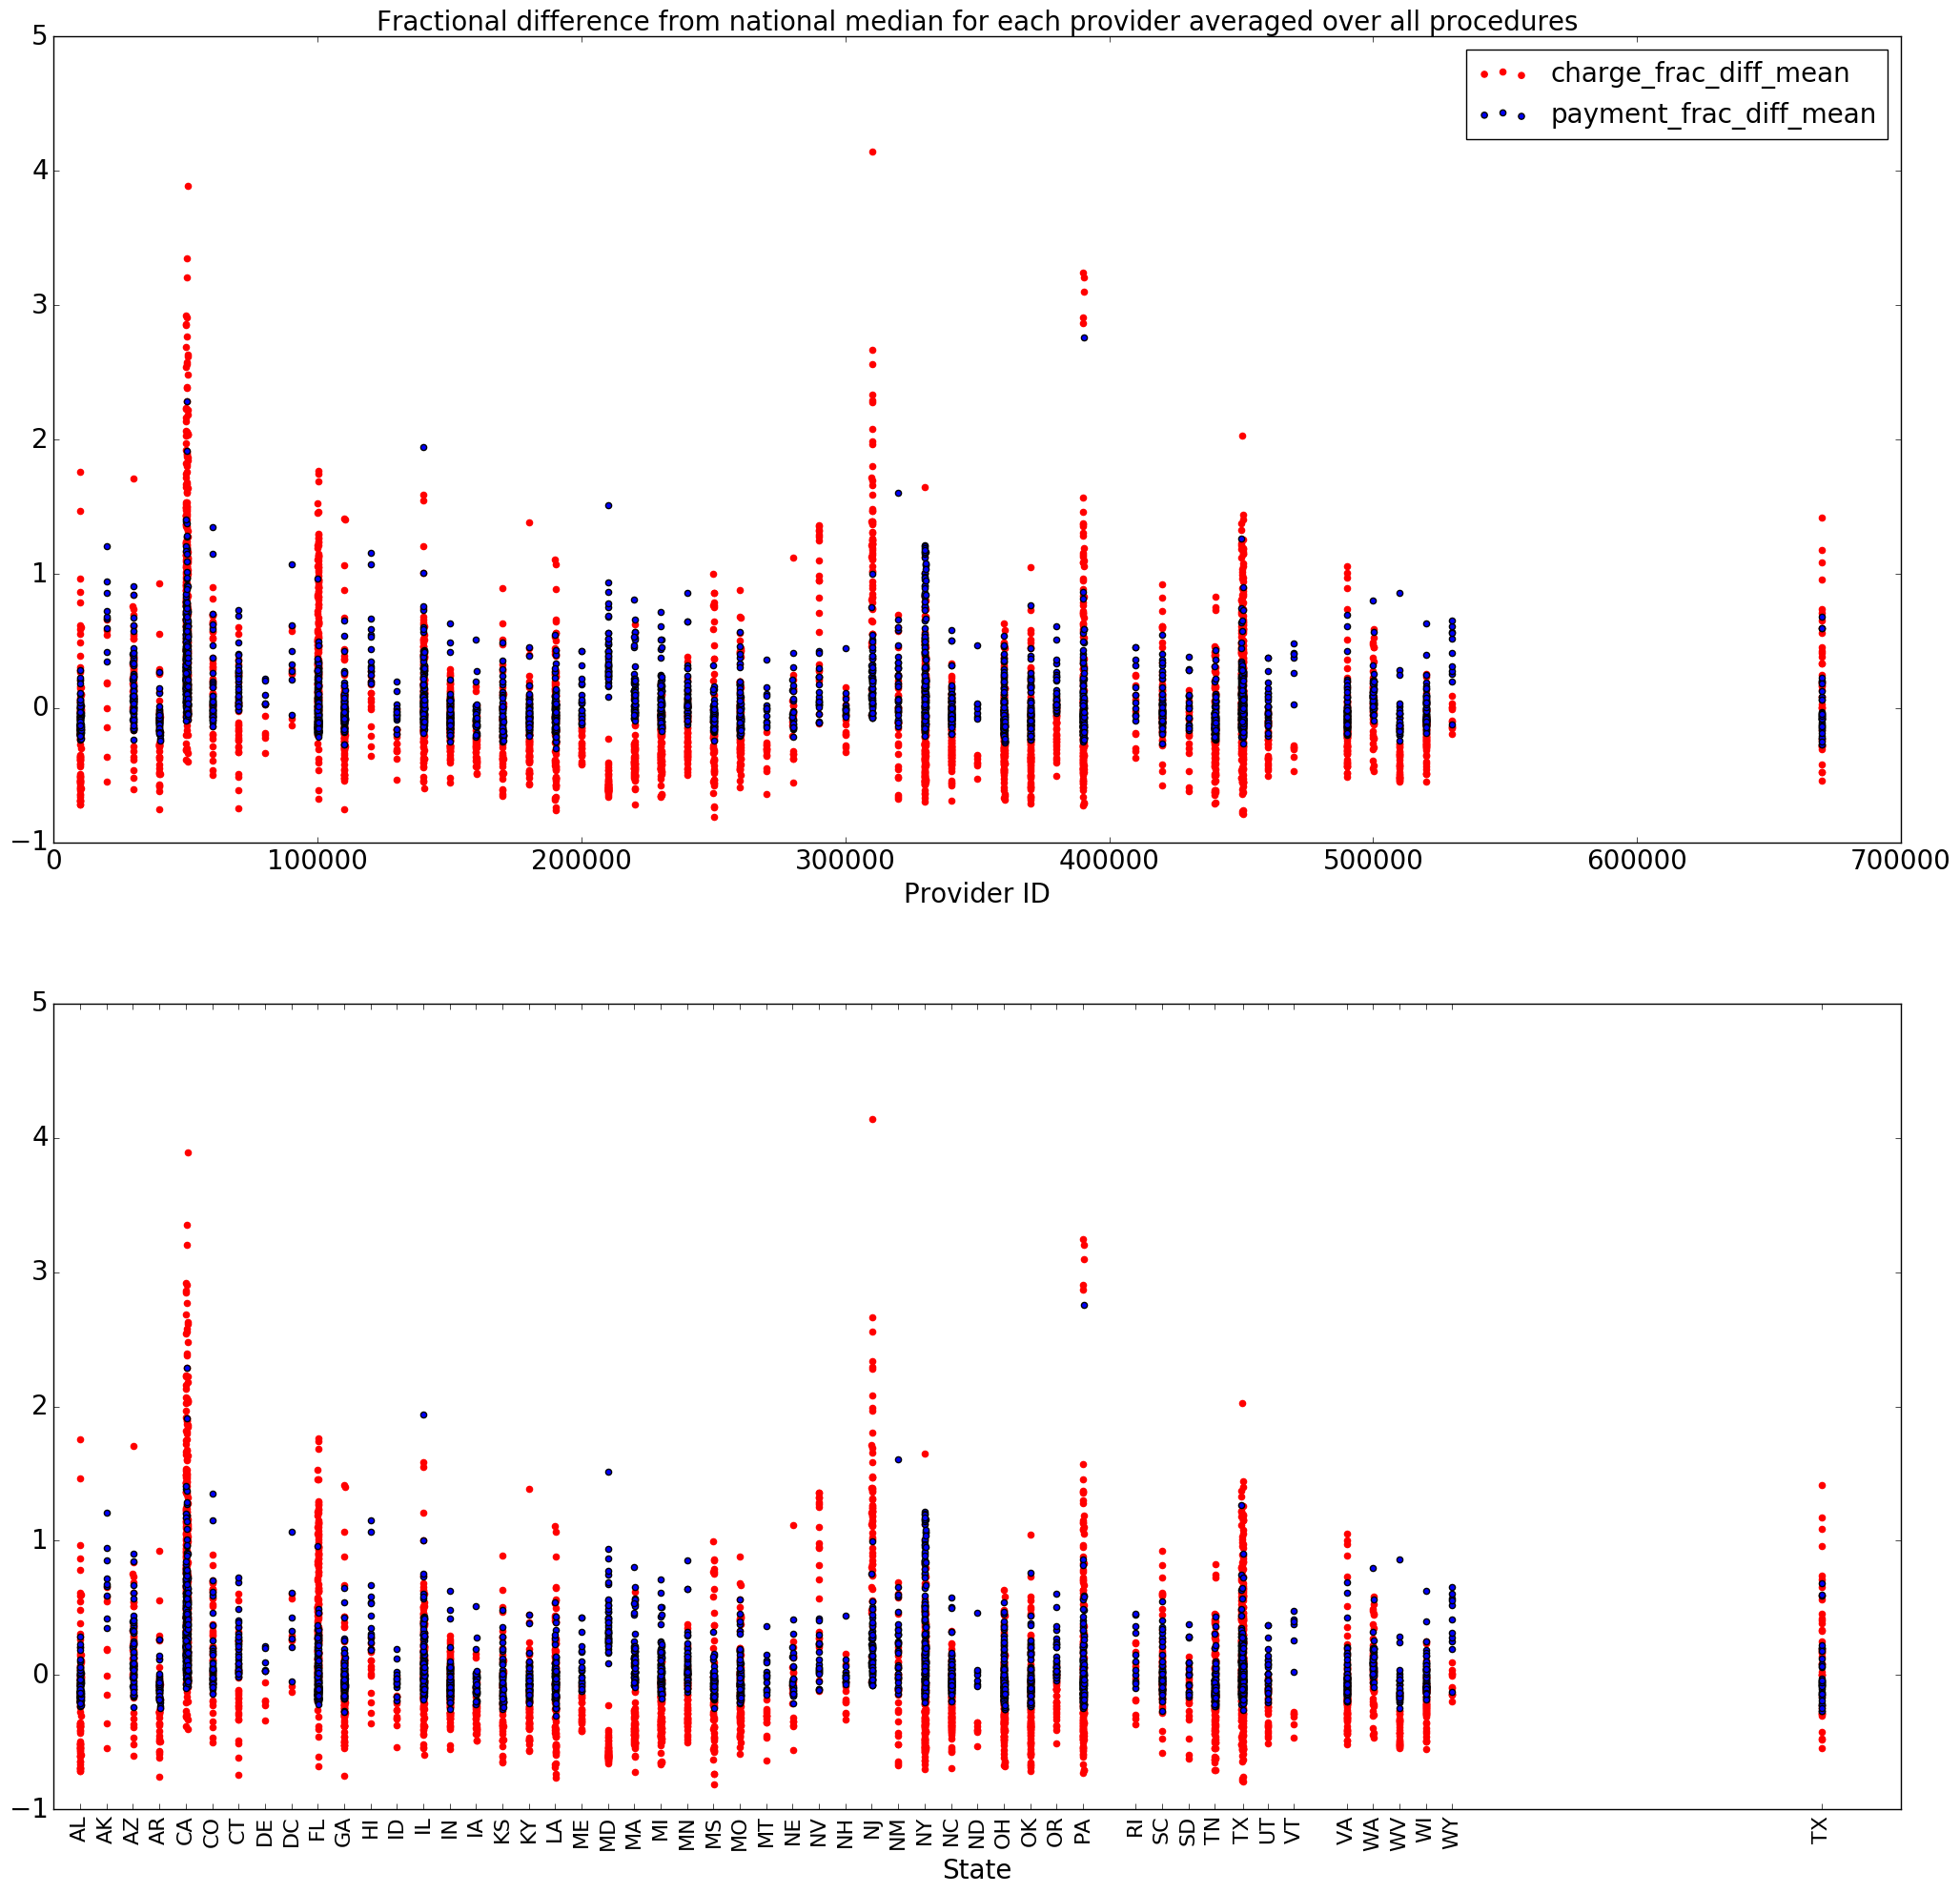

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,24), sharey=True)

ax[0].set_xlim(0,700000)
ax[0].set_ylim(-1,5)
ax[0].set_xlabel('Provider ID', fontsize=20)
ax[0].set_title('Fractional difference from national median for each provider averaged over all procedures',fontsize=20);
ax[0].tick_params(labelsize=20)

ax[1].set_xlim(0,700000)
ax[1].set_xlabel('State', fontsize=20)
ax[1].tick_params(labelsize=20)

stateid =df[['provider_id','provider_state']].drop_duplicates(subset='provider_state')
stateid = stateid.append({'provider_id':'670000','provider_state':'TX'},ignore_index=True)
ax[1].set_xticks(stateid.provider_id.astype(int))
ax[1].set_xticklabels(stateid.provider_state,fontsize=16,rotation='vertical')


ax[0].scatter(fracmn.provider_id.astype(int),fracmn.charge_frac_diff_mean,color='r')
ax[0].scatter(fracmn.provider_id.astype(int),fracmn.payment_frac_diff_mean)
ax[0].legend(['charge_frac_diff_mean','payment_frac_diff_mean'],fontsize=20)

ax[1].scatter(fracmn.provider_id.astype(int),fracmn.charge_frac_diff_mean,color='r')
ax[1].scatter(fracmn.provider_id.astype(int),fracmn.payment_frac_diff_mean);

* The following code uses a random forest classifier to try and predict whether or not the average billed cost of a given DRG definition will be above or below the national median. It splits the data into the test set and training set and uses the training set to train the model and then tests the model by making predictions on the test set. The predictions are compared to the actual data to see how well the model performs.

In [21]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
from sklearn import metrics as mt # mean_squared_error, confusion_matrix, roc_auc_score
from sklearn.neighbors import NearestNeighbors

* This merges the GPS coordinates of each provider into the main dataset, which now includes the original data as well as fractional differences in charges and payments from the national median, and a classifier for each of those showing whether they are above or below the national median (i.e True = fractional difference >= 0, and False = fractional difference < 0).

In [22]:
dftot = df.merge(dfprovgeo, on='provider_id')
print(len(dftot))
dftot.head(3)

163065


,drg_id,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,...,average_total_payments,average_medicare_payments,charge_frac_diff,payment_frac_diff,medicare_frac_diff,charge_frac_diff_class,payment_frac_diff_class,medicare_frac_diff_class,lat,lng
0,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,...,5777.24,4763.73,0.236842,-0.122385,-0.095943,True,False,False,31.216725,-85.363068
1,057,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,38,...,4894.76,3865.50,-0.006858,-0.196757,-0.242769,False,False,False,31.216725,-85.363068
2,064,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,84,...,10260.21,9167.08,-0.052088,-0.150975,-0.163294,False,False,False,31.216725,-85.363068


For each provider, calculates the number of other providers within a 40 mile radius (Takes around 3.5 minutes to run)

In [23]:
from geopy.distance import vincenty
import time

In [24]:
%%time
dfprovgeo['n_hosp'] = 0.0

pts = [dfprovgeo.lat,dfprovgeo.lng]
pts = list(list(x) for x in zip(*pts))

for index, row in dfprovgeo[['lat','lng']].iterrows():
    count = 0
    pt1 = [row.lat,row.lng]
    
    for pt in pts:
        dist = vincenty(pt1, pt).miles
        if dist < 40 and dist > 0:
            count +=1
            
    dfprovgeo.loc[index,'n_hosp'] = count

CPU times: user 3min 40s, sys: 0 ns, total: 3min 40s
Wall time: 3min 40s


In [25]:
dfprovgeo.head()

,provider_id,lat,lng,n_hosp
0,10001,31.216725,-85.363068,6.0
1,10005,34.221556,-86.159441,8.0
2,10006,34.793845,-87.683155,8.0
3,10011,33.596457,-86.667650,12.0
4,10016,33.252444,-86.813555,11.0


In [26]:
dftot = dftot.merge(dfprovgeo[['provider_id','n_hosp']], on='provider_id')

In [27]:
dftot.head(3)

,drg_id,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,...,average_medicare_payments,charge_frac_diff,payment_frac_diff,medicare_frac_diff,charge_frac_diff_class,payment_frac_diff_class,medicare_frac_diff_class,lat,lng,n_hosp
0,039,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,...,4763.73,0.236842,-0.122385,-0.095943,True,False,False,31.216725,-85.363068,6.0
1,057,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,38,...,3865.50,-0.006858,-0.196757,-0.242769,False,False,False,31.216725,-85.363068,6.0
2,064,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,84,...,9167.08,-0.052088,-0.150975,-0.163294,False,False,False,31.216725,-85.363068,6.0


* Selects the variables for X (GPS coordinates) and y (fractional difference classification for the average total cost) for the random forest classifier.

In [28]:
inx = ['lat','lng']
dfX = dftot.loc[:,inx]
dfY = dftot.loc[:,'charge_frac_diff_class']

dfX.head(3)

,lat,lng
0,31.216725,-85.363068
1,31.216725,-85.363068
2,31.216725,-85.363068


Does the test-train split and runs the RFC on the training set. It then calculates the R^2 score using the model to predict the test set.

In [29]:
rf = RandomForestClassifier(n_jobs=-1)
#rf.n_estimators=10

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size=2./3)

rf.fit(X_train,y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('R^2 score:',rf.score(X_test,y_test))

R^2 score: 0.874914911232


Plots the confusion matrix comparing the predicted label to the true label.

In [30]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    tick_label = ['f < 0','f > 0']
    plt.xticks(tick_marks, tick_label, rotation=45)
    plt.yticks(tick_marks, tick_label)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[23519  3398]
 [ 3401 24037]]
Normalized confusion matrix
[[ 0.87376008  0.12623992]
 [ 0.12395218  0.87604782]]


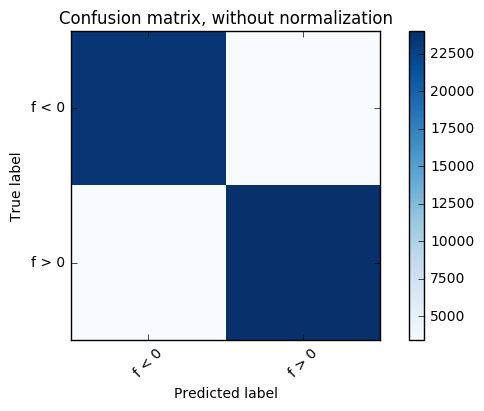

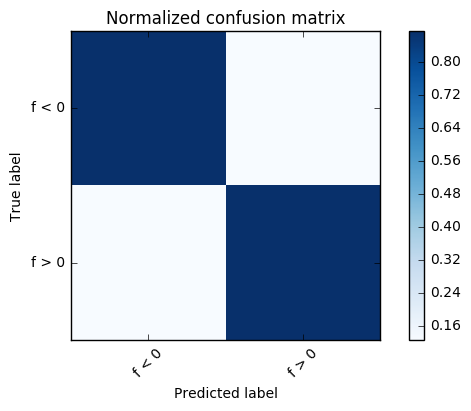

In [31]:
cm = mt.confusion_matrix(y_test, y_test_pred)

print('Confusion matrix')
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)


plt.figure()
plot_confusion_matrix(cm,title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

Plots the ROC curve and calculates the AUC score for the RFC model.

AUC Score = 0.949740325568


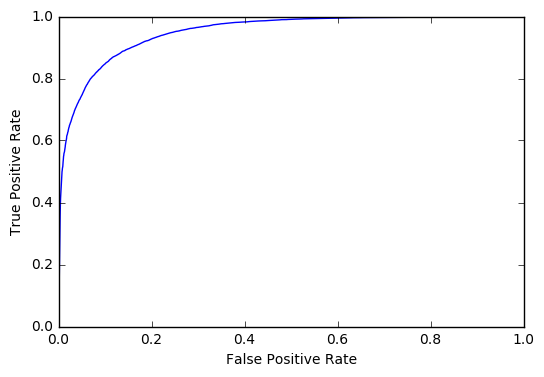

In [32]:
y_score = rf.predict_proba(X_test)[:,1]

print('AUC Score =',mt.roc_auc_score(y_test, y_score))
fpr, tpr, thresholds = mt.roc_curve(y_test,y_score)
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

Adding in other variables such as the population and median income by zip code seemed to have no significant effect. I also calculated the number of other providers within 40 miles of each provider, but adding that variable had no effect as well.

I also found that I get the same results with just the provider_id tag as the input X using pandas’ get_dummies to convert the variable to an indicator variable rather than numerical value. This makes me think that the GPS coordinates are essentially acting as an indicator for the specific provider rather than giving any useful information as far as relative position to other hospitals.